In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.metrics import max_error, mean_absolute_error, accuracy_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt




In [75]:
data = pd.read_csv("final_data.csv")

In [76]:
data=data.drop(["subject#", "Unnamed: 0"], axis=1)

In [152]:
X= np.array(data[['age','sex','test_time','Jitter(Abs)','Jitter:RAP','Shimmer', 
                  'Shimmer:APQ3','Shimmer:APQ5', 'Shimmer:APQ11','Shimmer:DDA',
                  'NHR', 'HNR','DFA', 'PPE']])
#X=data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)
y =np.array(data["motor_UPDRS"])


In [153]:
X_total, X_IVS_reg, y_total, y_IVS_reg = train_test_split(X, y,
                                test_size=0.20, random_state=22)

In [154]:
kf = KFold(n_splits=5, shuffle=False)

In [157]:
def plot_func():
    rmse_train = []
    rmse_test = []
    alphas=2**np.arange(-2,-10,-.05)
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, max_iter=999999).fit(X_train, y_train)
        preds_tr=ridge.predict(X_train)
        preds_te=ridge.predict(X_test)
        rmse_train.append(metrics.mean_squared_error(y_train, preds_tr, squared=False))
        rmse_test.append(metrics.mean_squared_error(y_test, preds_te, squared=False))

    plt.plot(alphas, rmse_train, label="rmse Train")
    plt.plot(alphas, rmse_test, label="rmse Test")
    plt.grid()
    plt.legend()
    plt.show()

In [158]:
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))
    print("----------------------------")

In [159]:
def compareValues(prediction, real):
    plt.figure(figsize=(7,7))
    plt.scatter(prediction, real)
    plt.grid()
    plt.plot([5, 40], [5, 40], c="r")
    plt.show()

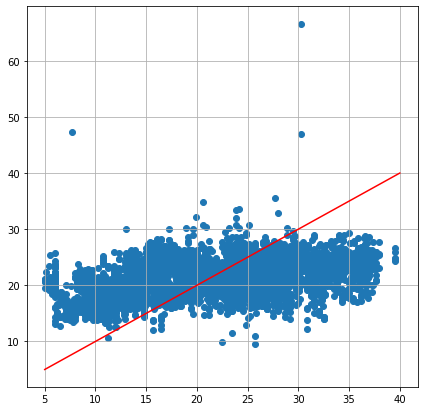

The RVE is:  0.14678965335272998
The rmse is:  7.461194371782319
The Correlation Score is: 0.3838 (p-value=8.463163e-165)

The Maximum Error is:  39.75548932722464
The Mean Absolute Error is:  6.298474710104142
----------------------------


In [160]:
# RIDGE MODEL

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    
    ridge = Ridge(alpha=0)
    ridge.fit(X_train, y_train)
    preds = ridge.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
compareValues(TRUTH_nfold, PREDS_nfold)
    
printRegStatistics(TRUTH_nfold, PREDS_nfold)
    

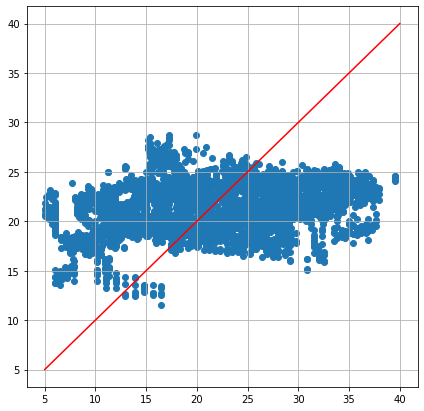

The RVE is:  0.0945872716151055
The rmse is:  7.686052320420633
The Correlation Score is: 0.3076 (p-value=1.618445e-103)

The Maximum Error is:  18.838288130403033
The Mean Absolute Error is:  6.599448481831003
----------------------------


In [161]:
# LASSO MODEL

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    lasso = Lasso(alpha=0.1, max_iter=999999)
    lasso.fit(X_train, y_train)
    preds = lasso.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
compareValues(TRUTH_nfold, PREDS_nfold)

printRegStatistics(TRUTH_nfold, PREDS_nfold)

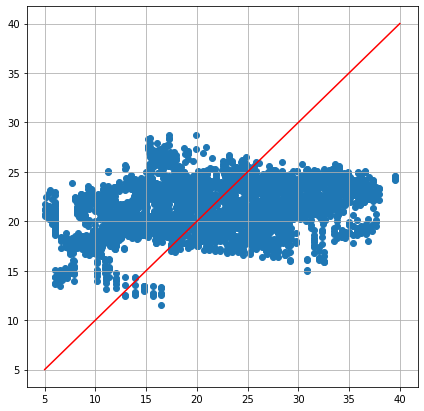

The RVE is:  0.09559385984807245
The rmse is:  7.681778676196687
The Correlation Score is: 0.3092 (p-value=1.175957e-104)

The Maximum Error is:  18.874447678251023
The Mean Absolute Error is:  6.592937701990357
----------------------------


In [162]:
# ELASTICS NET MODEL

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    elastic = ElasticNet(alpha=0.1, max_iter=999999)
    elastic.fit(X_train, y_train)
    preds = elastic.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
compareValues(TRUTH_nfold, PREDS_nfold)

printRegStatistics(TRUTH_nfold, PREDS_nfold)

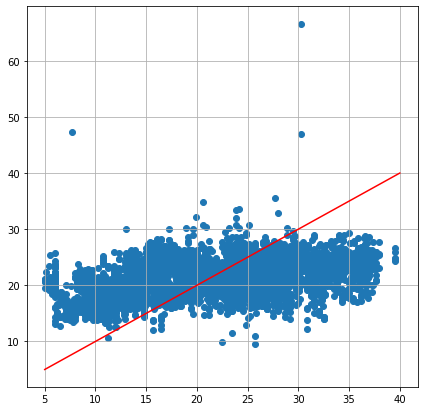

The RVE is:  0.1467896533523121
The rmse is:  7.461194371784152
The Correlation Score is: 0.3838 (p-value=8.463163e-165)

The Maximum Error is:  39.75548932747171
The Mean Absolute Error is:  6.2984747101026155
----------------------------


In [163]:
# LINEAR REGRESSION MODEL

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    linearReg = LinearRegression()
    linearReg.fit(X_train, y_train)
    preds = linearReg.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
        
compareValues(TRUTH_nfold, PREDS_nfold)

printRegStatistics(TRUTH_nfold, PREDS_nfold)

In [164]:
X = np.array(data.drop(["motor_UPDRS", "total_UPDRS"], axis=1))
y = np.array(data["motor_UPDRS"])

In [165]:
X_total_tree_reg, X_IVS_reg, y_total_tree_reg, y_IVS_reg = train_test_split(X, y, 
                                                test_size=0.20, random_state=22)

In [166]:
def compareValues(prediction, real):
    plt.figure(figsize=(7,7))
    plt.scatter(prediction, real)
    plt.grid()
    plt.plot([5, 40], [5, 40], c="r")
    plt.show()

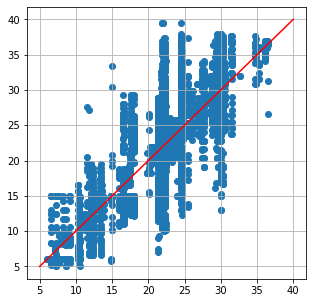

RVE:  0.6532
rmse:  4.7570
The Correlation Score is: 0.8082 (p-value=0.000000e+00)

The Maximum Error is:  18.42386666666666
The Mean Absolute Error is:  3.5830758073527855


In [167]:
kf = KFold(n_splits=5, shuffle=False)

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total_tree_reg):
    X_train, X_test = X_total_tree_reg[train_index], X_total_tree_reg[test_index]
    y_train, y_test = y_total_tree_reg[train_index], y_total_tree_reg[test_index]
    
    dtr = DecisionTreeRegressor(min_impurity_decrease=0.01, max_depth=6)
    dtr.fit(X_train, y_train)
    preds = dtr.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
    
plt.figure(figsize=(5,5))
plt.scatter(PREDS_nfold, TRUTH_nfold)
plt.plot((5, 40), (5,40), c="r")
plt.grid()
plt.show()

print("RVE: %7.4f"  % explained_variance_score(TRUTH_nfold, PREDS_nfold))
print("rmse: %7.4f" % mean_squared_error(TRUTH_nfold, PREDS_nfold, squared=False))

corr, pval = pearsonr(TRUTH_nfold, PREDS_nfold)
print("The Correlation Score is: %6.4f (p-value=%e)\n"%(corr,pval))
print("The Maximum Error is: ", max_error(TRUTH_nfold, PREDS_nfold))
print("The Mean Absolute Error is: ", mean_absolute_error(TRUTH_nfold, PREDS_nfold))


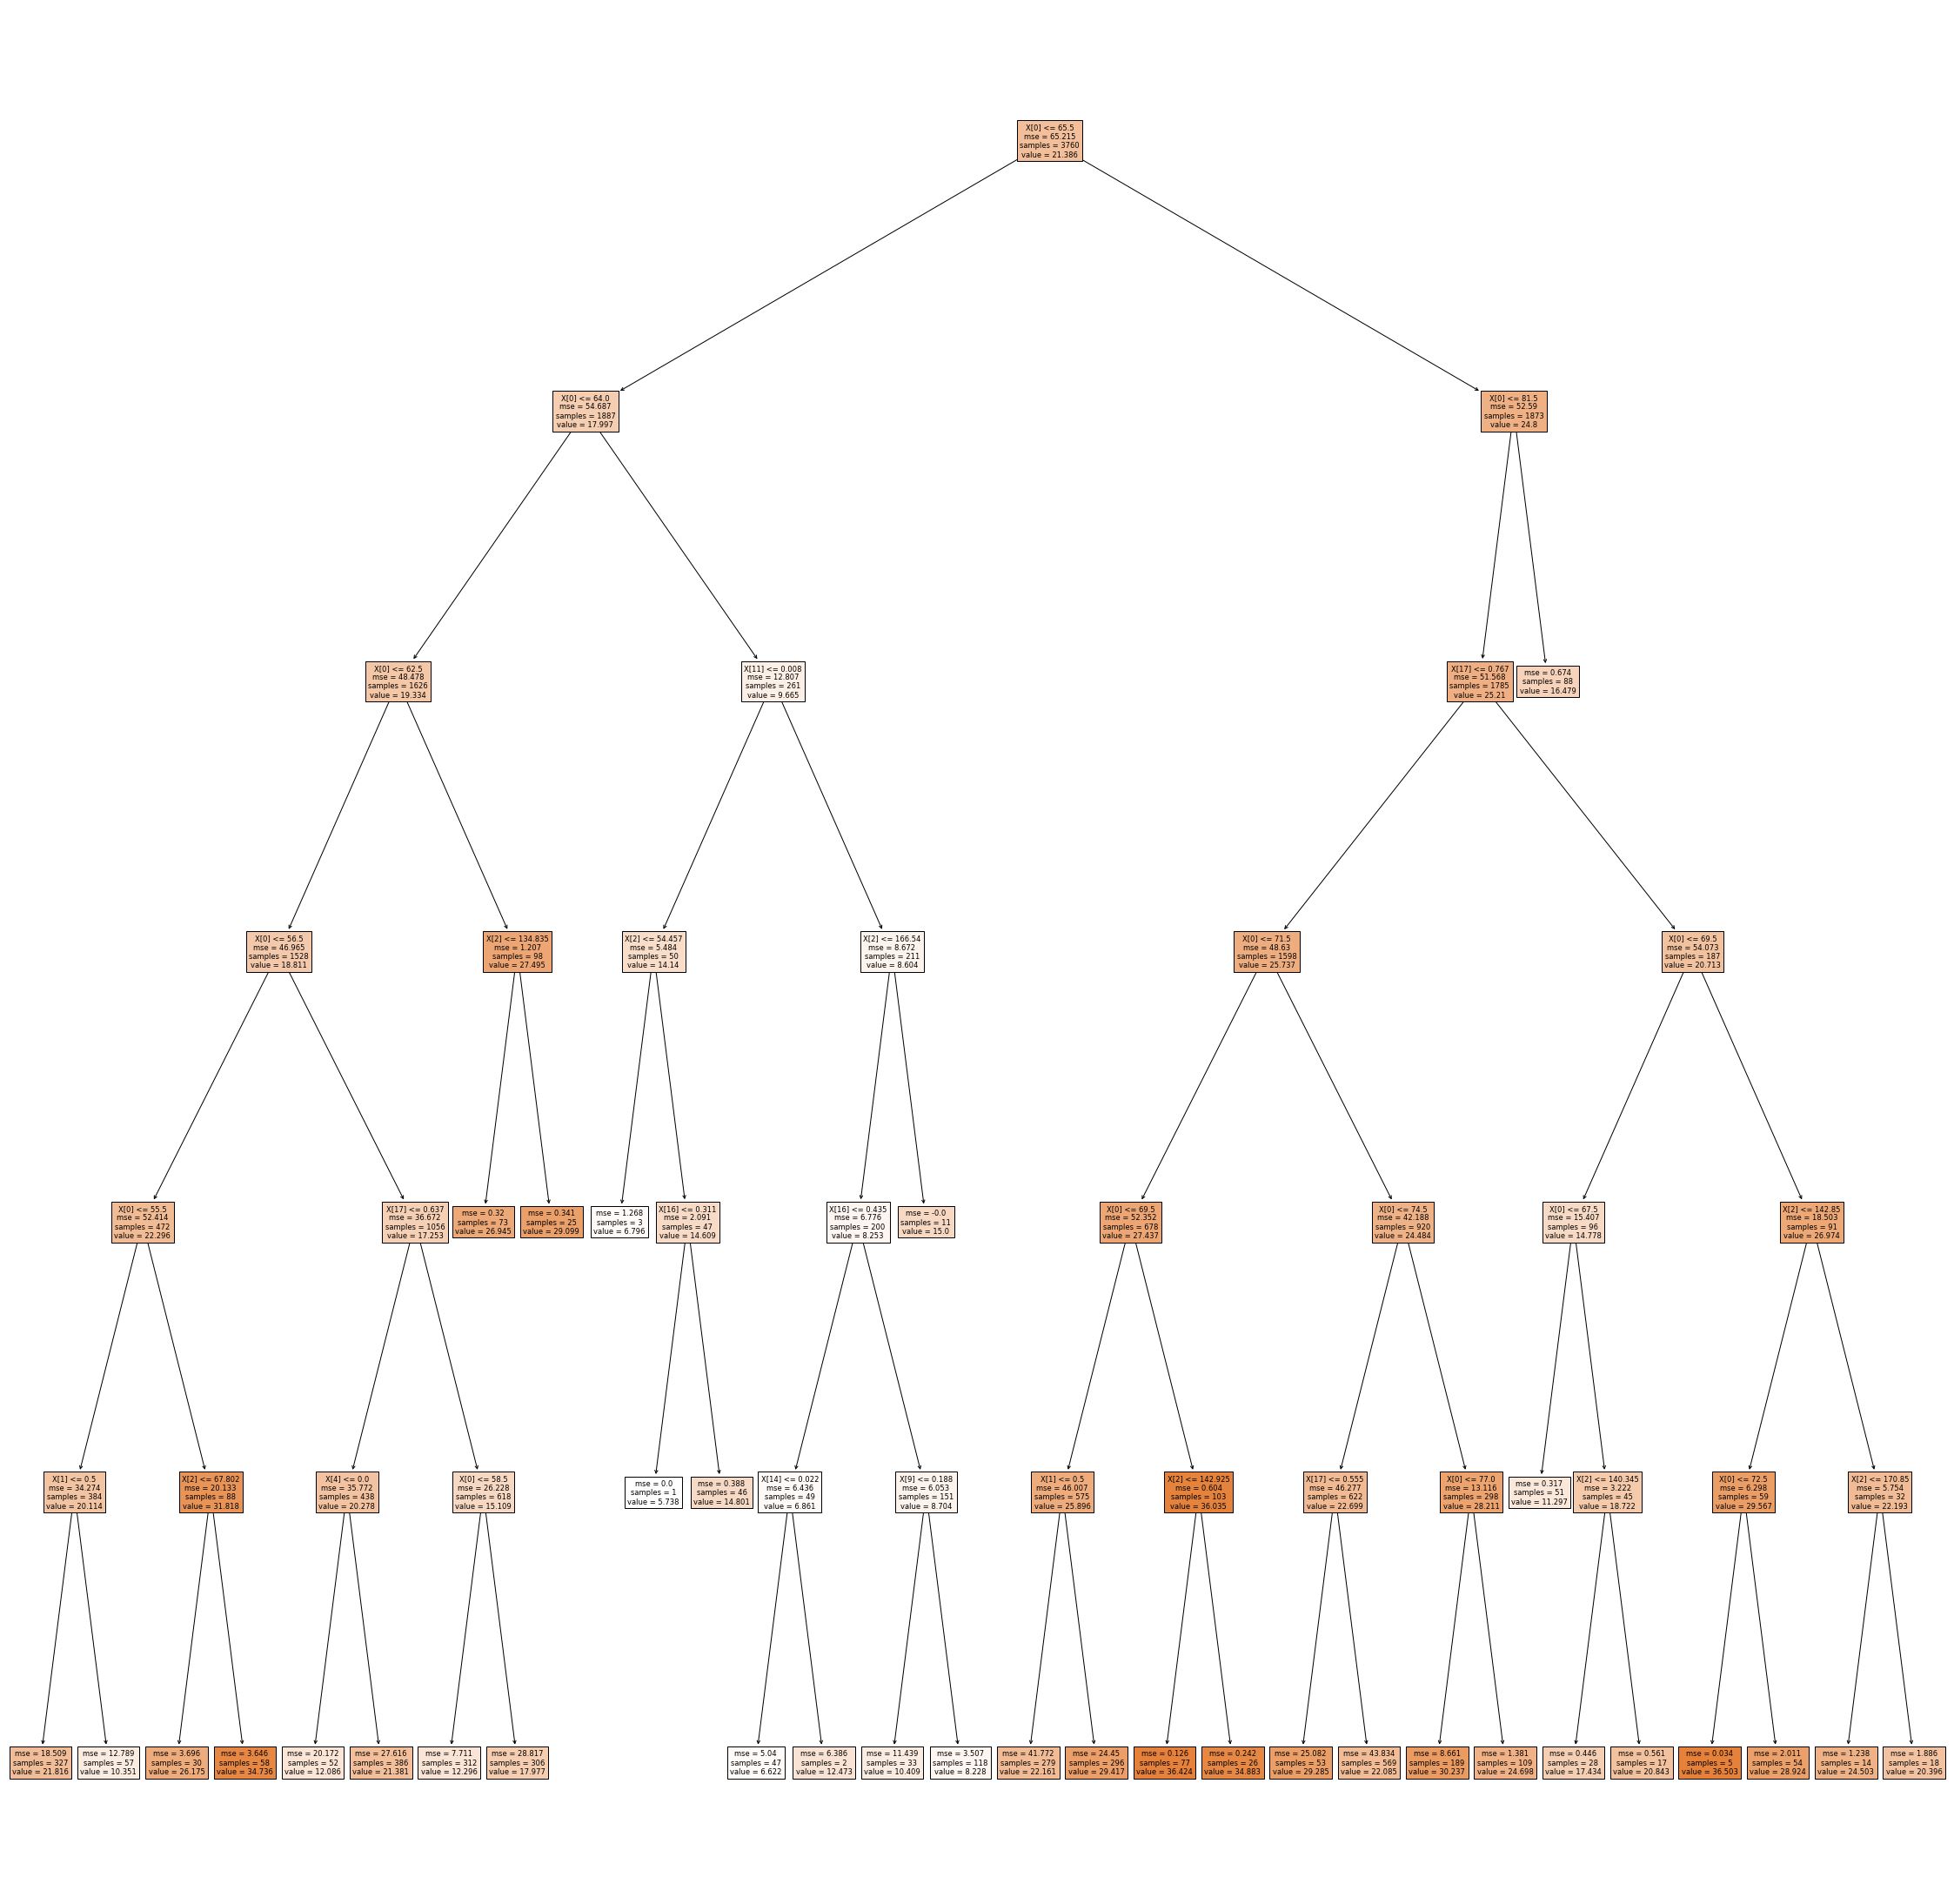

In [168]:
plt.figure(figsize=(40,40))
r=sklearn.tree.plot_tree(dtr, filled=True)
plt.show()

In [169]:
from sklearn import tree
import matplotlib.pyplot as plt

X_tree= np.array(data.drop(["total_UPDRS", "motor_UPDRS"], axis=1))
Y= np.array(data['total_UPDRS'])


y_tree=np.empty(Y.shape,dtype="object")
y_tree[:]="Low"

ind=[]

for i in range(len(Y)):
    if Y[i]>40:
        ind.append(i)
    
for j in range(len(ind)):
    y_tree[ind[j]]="High"


X_total_tree, X_IVS_tree, y_total_tree, y_IVS_tree = train_test_split(X_tree, 
                                        y_tree, test_size=0.20, random_state=22)



In [170]:
kf = KFold(n_splits=5, shuffle=False)

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total_tree):
    X_train, X_test = X_total_tree[train_index], X_total_tree[test_index]
    y_train, y_test = y_total_tree[train_index], y_total_tree[test_index]
    
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
    dt = dt.fit(X_train , y_train)
    preds = dt.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
        
errors=0
    
for c in range(len(TRUTH_nfold)):
    if TRUTH_nfold[c]!=PREDS_nfold[c]:
        errors=errors+1
            
print(errors, "em", len(TRUTH_nfold), "casos")
print("\n\n", round(100*errors/len(TRUTH_nfold)),"% de Erro")

335 em 4700 casos


 7 % de Erro


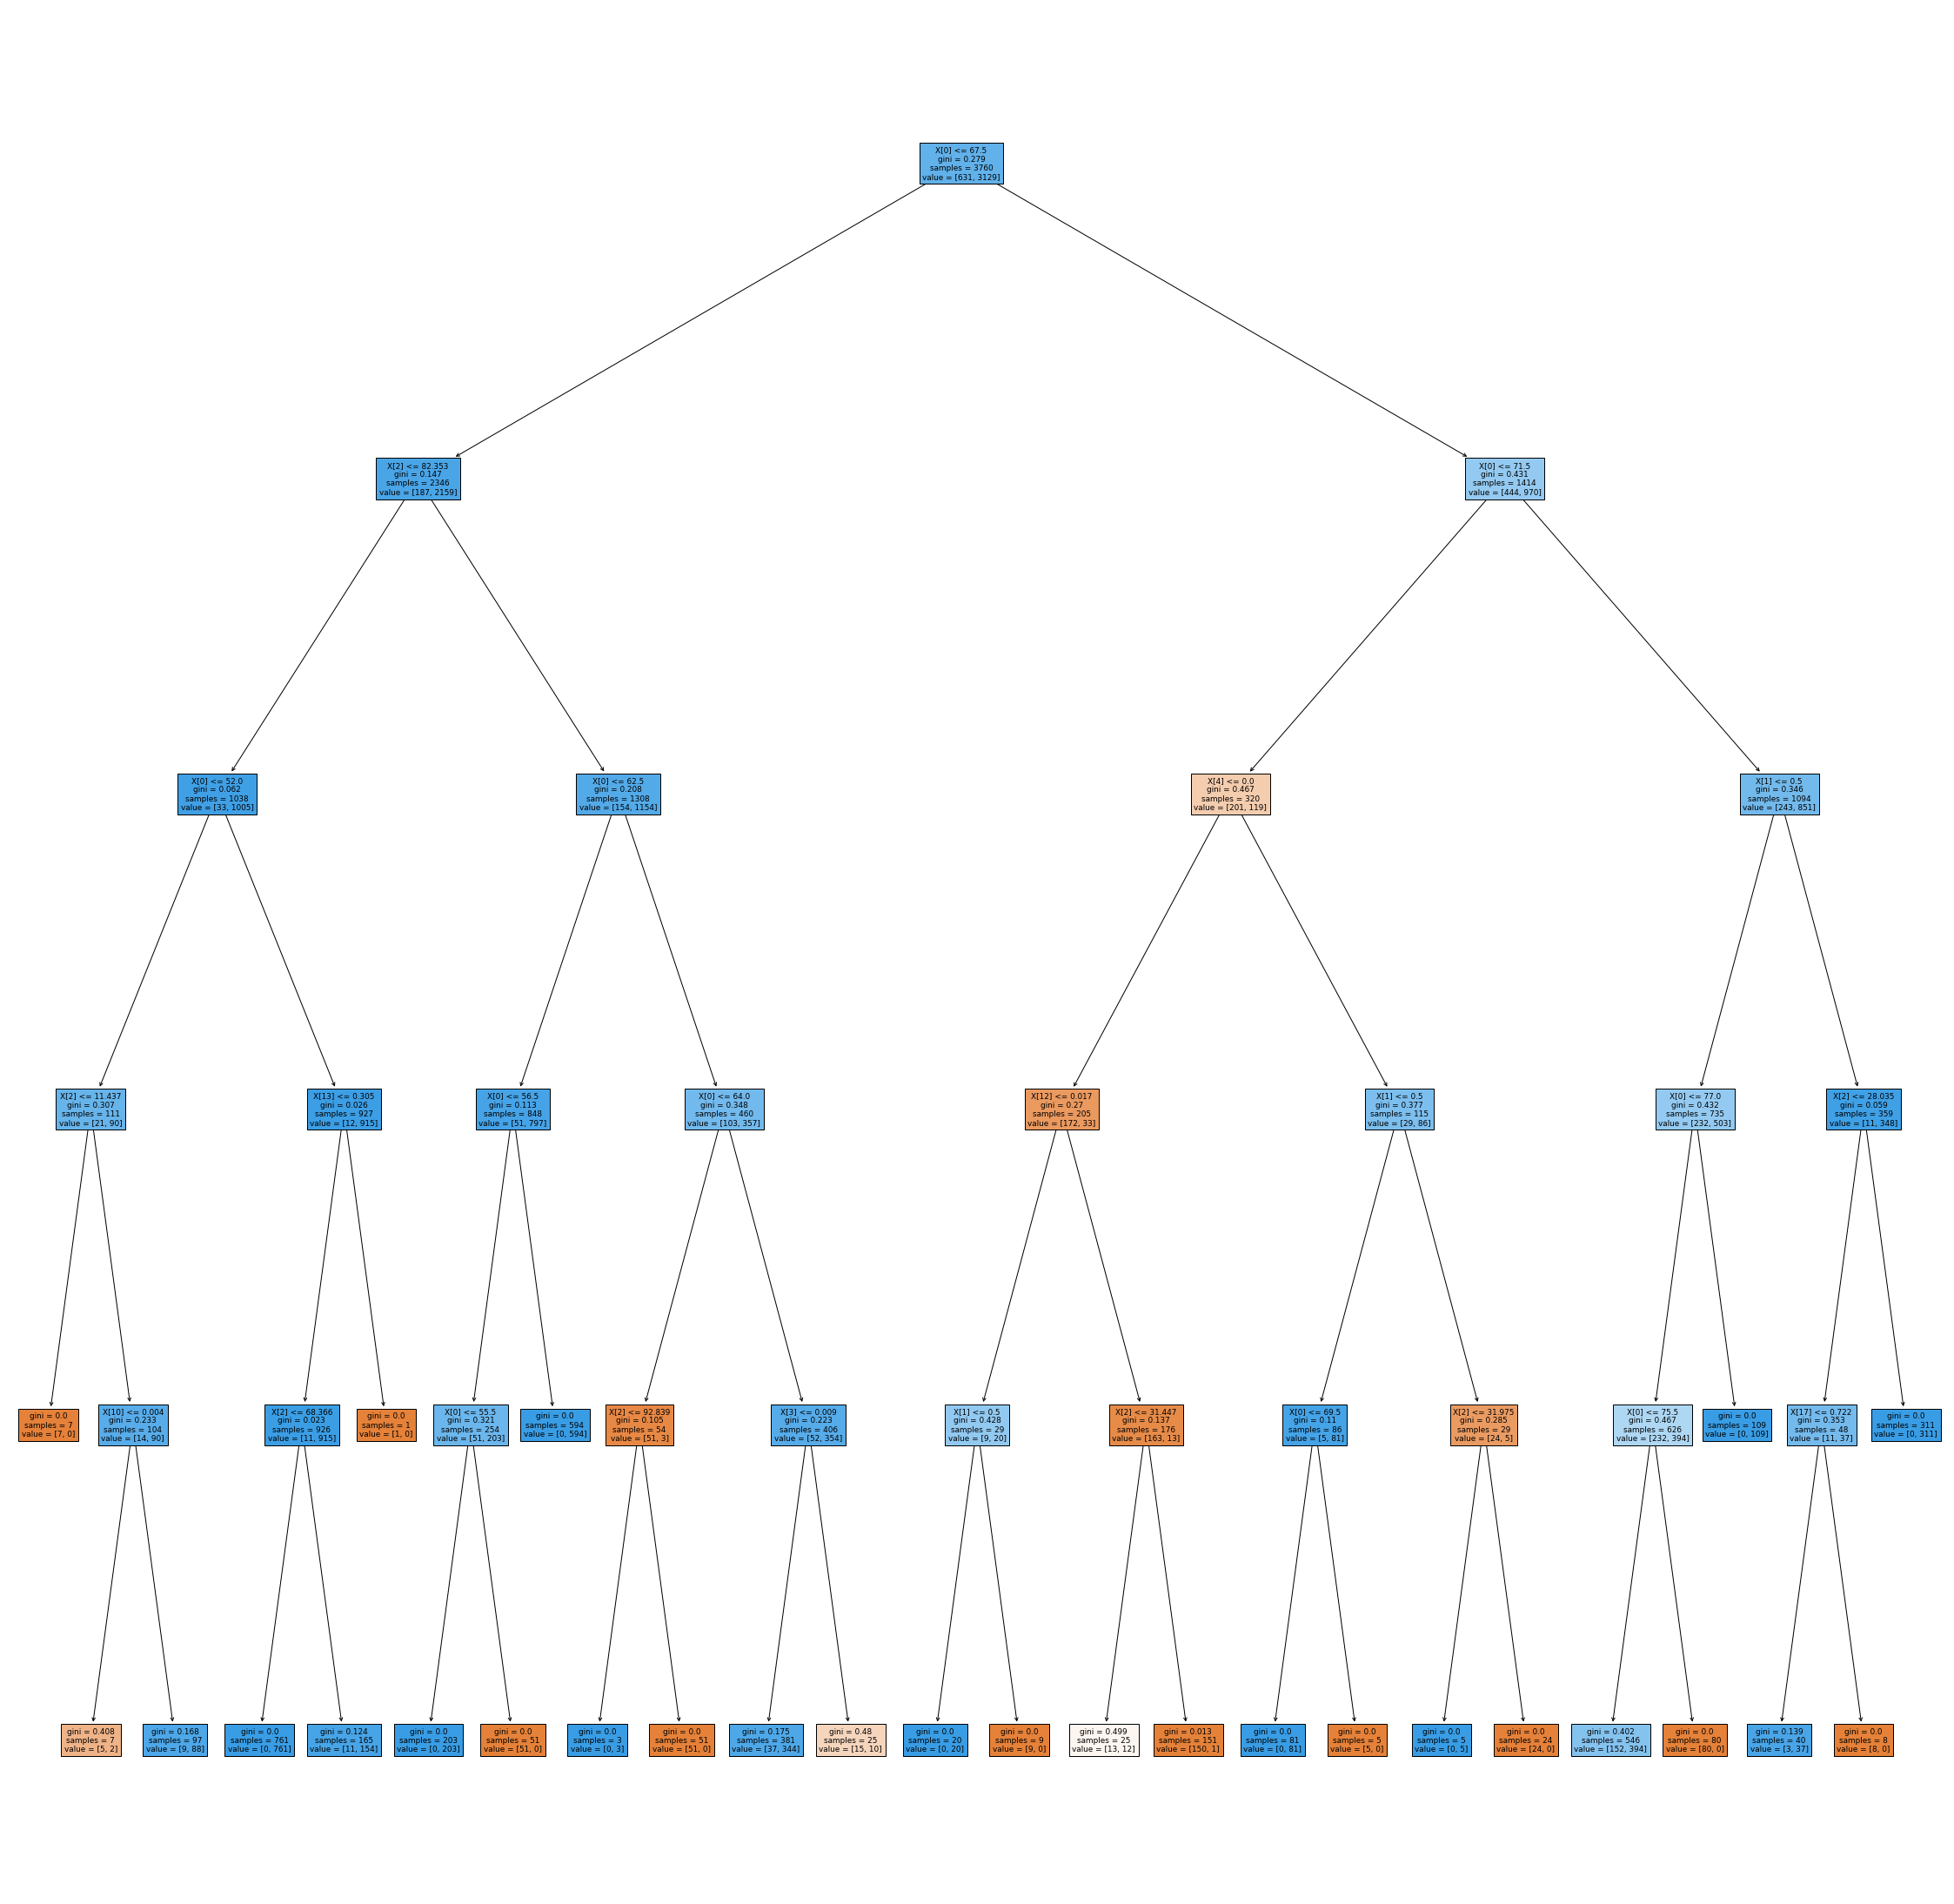

In [171]:
plt.figure(figsize=(40,40))
r=tree.plot_tree(dt, filled=True)
plt.show()

In [172]:
def printClassResultsTot(TRUTH_nfold, PREDS_nfold):
    print("The Accuracy is: %7.4f" % accuracy_score(TRUTH_nfold, PREDS_nfold))
    print("The Precision is: %7.4f" % precision_score(TRUTH_nfold, PREDS_nfold, pos_label='High'))
    print("The Recall is: %7.4f" % recall_score(TRUTH_nfold, PREDS_nfold, pos_label='High'))
    print("The F1 score is: %7.4f" % f1_score(TRUTH_nfold, PREDS_nfold, pos_label='High'))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH_nfold, PREDS_nfold))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(TRUTH_nfold, PREDS_nfold)))

printClassResultsTot(TRUTH_nfold, PREDS_nfold)

The Accuracy is:  0.9287
The Precision is:  0.9421
The Recall is:  0.6154
The F1 score is:  0.7445
The Matthews correlation coefficient is:  0.7268

This is the Confusion Matrix
     0     1
0  488   305
1   30  3877


In [173]:
X_logreg= np.array(data.drop(["total_UPDRS", "motor_UPDRS"], axis=1))
Y_new= np.array(data['total_UPDRS'])

y_logreg=np.empty(Y_new.shape,dtype="object")
y_logreg[:]="Low"


ind=[]

for i in range(len(Y_new)):
    if Y_new[i]>40:
        ind.append(i)
        
    
for j in range(len(ind)):
    y_logreg[ind[j]]="High"


X_total_logreg, X_IVS_logreg, y_total_logreg, y_IVS_logreg = train_test_split(X_logreg, 
                                            y_logreg, test_size=0.20, random_state=22)



Intercept (b0):  1.8665
Slope     (b1): -0.5658
-------------------------


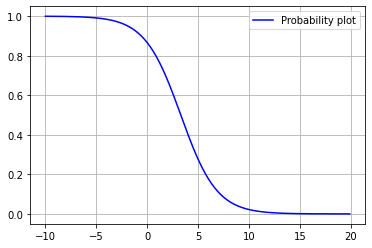

The Accuracy is:  0.8285
The Precision is:  0.3415
The Recall is:  0.0177
The F1 score is:  0.0336
The Matthews correlation coefficient is:  0.0433

This is the Confusion Matrix
    0     1
0  14   779
1  27  3880


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


kf = KFold(n_splits=5, shuffle=False)

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total_tree):
    X_train, X_test = X_total_logreg[train_index], X_total_logreg[test_index]
    y_train, y_test = y_total_logreg[train_index], y_total_logreg[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    mdl = LogisticRegression()
    mdl.fit(X_train, y_train)
    
    b0=mdl.intercept_[0]
    b1=mdl.coef_[0][0]
    
    preds = mdl.predict(X_test)
    
    
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

b0=mdl.intercept_[0]
b1=mdl.coef_[0][0]
print("Intercept (b0): %7.4f"% b0) 
print("Slope     (b1): %7.4f"% b1) 
print("-------------------------")
x=np.arange(-10, 20, 0.1)
p_sk= 1/(1+np.exp(-(b0+b1*x)))
    
plt.plot(x, p_sk, c="b", label="Probability plot")
plt.grid()
plt.legend()
plt.show()
    
    
    
printClassResultsTot(TRUTH_nfold, PREDS_nfold)

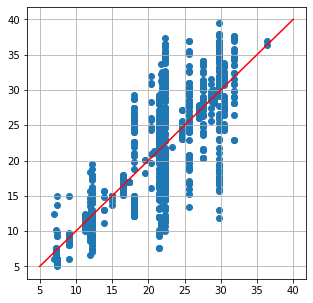

RVE:  0.6350
rmse:  5.0327
The Correlation Score is: 0.7969 (p-value=4.891157e-259)

The Maximum Error is:  17.894417849898595
The Mean Absolute Error is:  3.787049961694051


In [175]:
dtr.fit(X_total_tree_reg, y_total_tree_reg)
final_preds = dtr.predict(X_IVS_reg)

plt.figure(figsize=(5,5))
plt.scatter(final_preds,  y_IVS_reg)
plt.plot((5, 40), (5,40), c="r")
plt.grid()
plt.show()

print("RVE: %7.4f"  % explained_variance_score( y_IVS_reg, final_preds))
print("rmse: %7.4f" % mean_squared_error( y_IVS_reg, final_preds, squared=False))

corr, pval = pearsonr( y_IVS_reg, final_preds)
print("The Correlation Score is: %6.4f (p-value=%e)\n"%(corr,pval))
print("The Maximum Error is: ", max_error( y_IVS_reg, final_preds))
print("The Mean Absolute Error is: ", mean_absolute_error( y_IVS_reg, final_preds))

In [176]:
dt_new = dt.fit(X_total_tree , y_total_tree)
final_preds_tree = dt_new.predict(X_IVS_tree)

errors=0
    
for c in range(len(y_IVS_tree)):
    if y_IVS_tree[c]!=final_preds_tree[c]:
        errors=errors+1
            
print(errors, "em", len(y_IVS_tree), "casos")
print("\n\n", round(100*errors/len(y_IVS_tree)),"% de Erro")

printClassResultsTot(y_IVS_tree, final_preds_tree)

86 em 1175 casos


 7 % de Erro
The Accuracy is:  0.9268
The Precision is:  0.9774
The Recall is:  0.6103
The F1 score is:  0.7514
The Matthews correlation coefficient is:  0.7383

This is the Confusion Matrix
     0    1
0  130   83
1    3  959
